## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# read our data from ab_data csv file
df = pd.read_csv('ab_data.csv')

# get an overview of our data
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
# use shape function to get [# of rows, # of columns] 
# and get only the first output  to answer this Q
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
# use nuqinue function to get # of unique user IDs
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
# since our converted column is 0s or 1s
# use mean() function to get proportion of users
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
# we will simply filter data where group = control landing_page=new_page then sum
df.query('(group=="treatment" and landing_page=="old_page") or (group=="control" and landing_page=="new_page")').shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
# check data types and nulls
df.info()

# No missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# we will simply filter out data where group = control landing_page=new_page
# or group = treatment landing_page= old_page


df2 = df.query('(group=="treatment" and landing_page=="new_page") or (group=="control" and landing_page=="old_page")')

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# use nuqinue function to get # of unique user IDs
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# use duplicated() function to get duplicates
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
# use duplicated() function to get duplicates 
# but don't specify column to get entire row

df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# use drop_duplicates() function to drop duplicated row, conditioning on user_id
df2 = df2.drop_duplicates(subset=['user_id'])

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# since our converted column is 0s or 1s
# use mean() function to get proportion of users

df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# since our converted column is 0s or 1s
# use mean() function to get proportion of users
# but in this case will only compute it for control group

df2.query('group=="control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# since our converted column is 0s or 1s
# use mean() function to get proportion of users
# but in this case will only compute it for treatment group

df2.query('group=="treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
# to get prob of receiving new page,
# first filter landing_page column where its equal new_page
# then get # of rows by using shape function
# finally we divide by total # of rows of our dataframe df2

df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

> - Conversion Probability is almost the same for both groups.
> - Moreover, the probability for receiving the new page is 50%.

> Hence we cannot conculde on the reason of conversion being the treatment.
We need more statisitical evidence.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

> - $H_{0}$: $P_{new}$ <= $P_{old}$
> - $H_{1}$: $P_{new}$ > $P_{old}$

> where (Type I error) alpha = 0.05

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
# compute conversion rate for new page in our df
p_new = df['converted'].mean()
p_new

0.11965919355605512

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
# compute conversion rate for old page in our df
p_old = df['converted'].mean()
p_old

0.11965919355605512

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
# get # of rows where landing_page = new_page & group = treatment
n_new = df.query('landing_page=="new_page" and group=="treatment"').shape[0]
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
# get # of rows where landing_page = old_page & group = control
n_old = df.query('landing_page=="old_page" and group=="control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# create new_page_converted radnom array of 1s & 0s of size n_new
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new,1-p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# create new_page_converted radnom array of 1s & 0s of size n_new
old_page_converted = np.random.choice([1,0], size=n_new, p=[p_old,1-p_old])
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

-0.00083957855909050361

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
# create p_diffs radnom array of difference between simulated_p_new & simulated_p_old
simulated_p_new = np.random.binomial(n_new, p_new, 10000)
simulated_p_old = np.random.binomial(n_old, p_old, 10000)

# normalize simulated_p_new & simulated_p_old by dividing by their length
# and compute difference and store it in p_diffs
p_diffs = simulated_p_new/n_new - simulated_p_old/n_old
p_diffs

array([-0.00187512, -0.00131758,  0.00078852, ..., -0.00171672,
       -0.00241183, -0.00078046])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

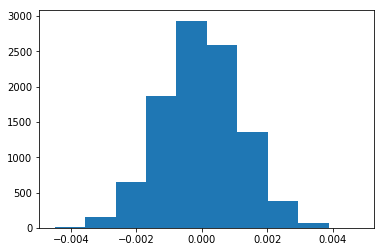

In [27]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
real_diff = df2.query('landing_page == "new_page"')['converted'].mean() - df2.query('landing_page == "old_page"')['converted'].mean()
(p_diffs > real_diff).mean()

0.90300000000000002

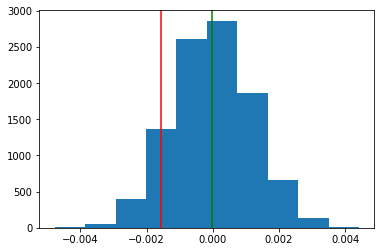

In [29]:
# check the shape of the distribution we should expect to get under our null
std_sampling_dist = np.std(p_diffs)
null_mean = 0
null_vals = np.random.normal(null_mean, std_sampling_dist, 10000)

plt.hist(null_vals);
plt.axvline(x=real_diff, color = 'red'); # where our true mean falls on null dist
plt.axvline(x=p_diffs.mean(), color = 'green'); # where our sampled mean falls on null dist

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

> P value is ~ 0.9, which is higher than our alpha (0.05), hence we fail to reject the null hypothesis, and this means there is no statistical evidence  there is difference between the new and old pages.

> Moreover, when we draw the distribution we should expect to get from our sampled data under the Null Hypothesis, we expect to get no or negative difference, we see that the true mean is negative & our samples mean is zero, i.e. new page is not doing better than the old page, hence we fail to reject the Null Hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df.query('landing_page=="old_page"')['converted'].sum()
convert_new = df.query('landing_page=="new_page"')['converted'].sum()
n_old = df.query('landing_page=="old_page"').shape[0]
n_new = df.query('landing_page=="new_page"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
# import needed  library
from statsmodels.stats.proportion import proportions_ztest

# add both convert_old & convert_new in an array
count = np.array([convert_new, convert_old])

# add both n_old & n_new in an array
nobs = np.array([n_new, n_old])

# calculate p-val using proportions_ztest
stat, pval = proportions_ztest(count, nobs, alternative='larger')
stat, pval

(-1.3683341399998907, 0.9143962454534289)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
> p-val (0.914) > alpha (0.05)

> z-score (-1.36) < q_alpha (1.96)

> These figures agree with our previous calulations & pushes us to fail to reject our Null Hypothesis 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
> logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# create intercept
df2['intercept'] = 1

# create dummy variable for landing page
df2[['new','old']] = pd.get_dummies(df2['landing_page'])

# create dummy variable for group
df2[['control','ab_page']] = pd.get_dummies(df2['group'])

# check our df
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new,old,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,1,0


In [33]:
# drop unneeded columns
del df2['old']
del df2['control']

# check our df
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
# instantiate our model
mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

# fit model
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
# view model summary
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-02 15:49 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

> p-val for ab_page =~ 0.1899, it differs because there might be a relation between variables that was not accounted for in partII, but was detected by our regression model here

> This shall impact our belief of the Null Hypothesis, which means the effect of the 2 pages is not equal 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
> one hint was given above is related to time, we should consider implementing our measurement techniques within time frames.

> May be the new page was not introduced before certain point in time, may be the # of users changed over certain periods. These two conditions should impact our results 

In [36]:
# work on datetime column, first we convert it to datetime
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

# check data for min & max timestamp values
df2[(df2['timestamp']==df2['timestamp'].min()) | (df2['timestamp']==df2['timestamp'].max())]

,user_id,timestamp,group,landing_page,converted,intercept,new,ab_page
131228,922696,2017-01-02 13:42:05.378582,treatment,new_page,0,1,1,1
193652,920411,2017-01-24 13:41:54.460509,control,old_page,0,1,0,0


In [37]:
# get weekday by name of datetime column
df2['dayofweek'] = df2['timestamp'].dt.weekday_name

# change weekday name to either 'weekend' or 'weekday'
df2['Weekday'] = np.where(((df2['dayofweek']== 'Sunday') | (df2['dayofweek']== 'Saturday')) == True, 0, 1)

# get night and day from timestamp column - choose after 6 pm to be considered night
df2['daytime'] = df2.timestamp.apply(lambda x:0  if int(x.strftime('%H')) >18 else 1)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new,ab_page,dayofweek,Weekday,daytime
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,Saturday,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,Thursday,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,Wednesday,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,Sunday,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,Saturday,0,1


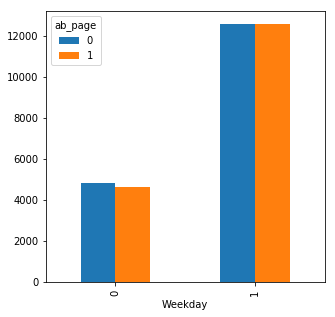

In [38]:
# plot relation between weekday & group with conversion sum
df2.groupby(['Weekday','ab_page'])['converted'].sum().unstack('ab_page').plot.bar(figsize=(5,5));

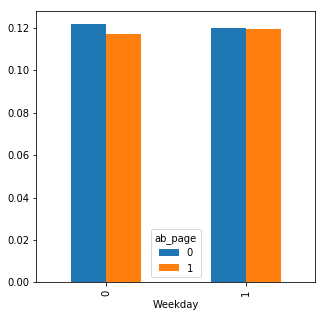

In [39]:
# plot relation between weekday, group and conversion average
df2.groupby(['Weekday','ab_page'])['converted'].mean().unstack('ab_page').plot.bar(figsize=(5,5));

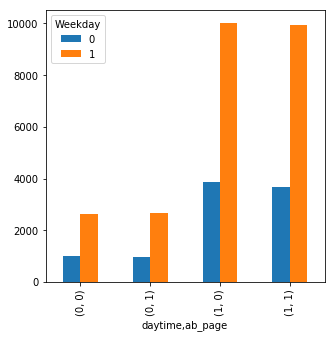

In [40]:
# plot relation between weekday,daytime & group with conversion sum
df2.groupby(['Weekday','daytime','ab_page'])['converted'].sum().unstack('Weekday','daytime').plot.bar(figsize=(5,5));

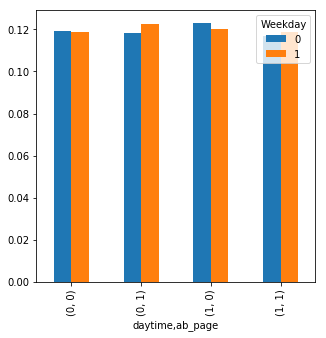

In [41]:
# plot relation between weekday,daytime & group with conversion mean
df2.groupby(['Weekday','daytime','ab_page'])['converted'].mean().unstack('Weekday','daytime').plot.bar(figsize=(5,5));

In [42]:
# run regression model again and account for weekday
# instantiate our model
mod2 = sm.Logit(df2['converted'],df2[['intercept','ab_page' ,'Weekday','daytime']])

# fit model
res2 = mod2.fit()

# view model summary
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-02 15:49 AIC:              212784.2173
No. Observations:   290584           BIC:              212826.5358
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9843    0.0166  -119.7579  0.0000  -2.0168  -1.9518
ab_page      -0.0150    0.0114    -1.3098  0.1903  -0.0374   0.0074
Weekday      -0.0006    0.0128    -0.0483  0.9615  -0.0257   0.0245
daytime      -0.0051    0.0141    -0.3615  0.7177  -0.0326   0.0225
==================================================================

"""

> From those graphs we can see that the count of conversions is related to weekday and daytime, however the ovreall average is almost the same

> From the model we see that weekday and daytime are not statistically important as their p-val > alpha (0.05)

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
# read countries df
country_df = pd.read_csv('countries.csv')
# check data
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [44]:
# join df2 with country_df
df2 = df2.join(country_df.set_index('user_id'), on='user_id')

# check df2
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new,ab_page,dayofweek,Weekday,daytime,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,Saturday,0,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,Thursday,1,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,Wednesday,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,Sunday,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,Saturday,0,1,US


In [45]:
# check countries to creat dummy variable
df2.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [46]:
# create dummy for country column
df2[['US','CA','UK']] = pd.get_dummies(df2['country'])

# remove one of them
del df2['CA']

# check our df
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new,ab_page,dayofweek,Weekday,daytime,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,Saturday,0,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,Thursday,1,1,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,Wednesday,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,Sunday,0,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,Saturday,0,1,US,0,1


In [47]:
# run regression model again and account for country and page
# instantiate our model
mod3 = sm.Logit(df2['converted'],df2[['intercept','US','UK']])

# fit model
res3 = mod3.fit()

# view model summary
res3.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-02 15:49 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
US           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
UK           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
==================================================================

"""

> This model shows that **country** has statisitcal insignificance in our model and it doesn't impact the results
as all of there p-values > alpha (0.05)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
# run regression model again and account for country, daytime, weekday and page
# instantiate our model
mod4 = sm.Logit(df2['converted'],df2[['intercept', 'Weekday','daytime','ab_page','US','UK']])

# fit model
res4 = mod4.fit()

# view model summary
res4.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-02 15:49 AIC:              212784.9911
No. Observations:   290584           BIC:              212848.4690
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9749    0.0193  -102.4818  0.0000  -2.0127  -1.9372
Weekday      -0.0006    0.0128    -0.0444  0.9646  -0.0257   0.0246
daytime      -0.0051    0.0141    -0.3637  0.7161  -0.0327   0.0224
ab_page      -0.0149    0.0114    -1.3058  0.1916  -0.0373   0.0075
US           -0.0507    0.0284    -1.7839  0.0744  -0.1063   0.0050
UK           -0.0099    0.0133    -0.7434  0.4573  -0.0359   0.0162
==================================================================

"""

In [49]:
# creat Interaction between country & group
df2['UK_new'] = df2['UK'] * df2['ab_page']
df2['US_new'] = df2['US'] * df2['ab_page']

# run regression model again and account for interaction, daytime, weekday and page
# instantiate our model
mod5 = sm.Logit(df2['converted'],df2[['intercept', 'Weekday','daytime','ab_page','UK_new','US_new']])

# fit model
res5 = mod5.fit()

# view model summary
res5.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-02 15:49 AIC:              212782.8016
No. Observations:   290584           BIC:              212846.2795
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9843    0.0166  -119.7547  0.0000  -2.0168  -1.9518
Weekday      -0.0006    0.0128    -0.0444  0.9645  -0.0257   0.0246
daytime      -0.0052    0.0141    -0.3671  0.7136  -0.0327   0.0224
ab_page       0.0074    0.0180     0.4112  0.6809  -0.0279   0.0428
UK_new       -0.0257    0.0188    -1.3642  0.1725  -0.0625   0.0112
US_new       -0.0901    0.0405    -2.2258  0.0260  -0.1694  -0.0108
==================================================================

"""

> This last model shows that both **weekday + daytime** & **country**  have statisitcal insignificance, they don't impact the results
as all of there p-values > alpha (0.05)

> This last model shows that both **weekday + daytime** & **country_group interaction**  have statisitcal insignificance, they don't impact the results
as all of there p-values > alpha (0.05)

## Conclusion

> - We should not settle for one method of analysis as some methods don't fully describe the entire true situation

> - We should account for details related to subjects driving the results; here we start with our analysis without accounting for time nor place of residence of our subjects, hence we were driven to incomplete conclusions

> - We should explore different aspects of aggregation (count/sum/average .. etc) as our final figures may change drastically and to avoid paradoxes

> - Finally, we fail to reject the Null

> - The new page is doing less or at most as the old page, hence we can disregard implementing it

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0